In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
HMDA_clean_final = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/interim/HMDA_clean_final.pkl")

In [125]:
low5_geo = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/processed/enrichment/low5_geo.pkl")

In [126]:
low5_geo = low5_geo.reset_index(drop=False)

In [127]:
HMDA_clean_final["county_code"] = HMDA_clean_final["county_code"].astype("int64")
HMDA_clean_final["loan_granted"] = HMDA_clean_final["loan_granted"].replace("Granted", 1)
HMDA_clean_final["loan_granted"] = HMDA_clean_final["loan_granted"].replace("Not Granted", 0)
HMDA_clean_final["loan_granted"] = HMDA_clean_final["loan_granted"].astype("int64")

In [128]:
HMDA_clean_final["race_code"] = HMDA_clean_final["applicant_race-1"].apply(lambda x: 1 if x == "White" else 0).astype("int64")

HMDA_clean_final = HMDA_clean_final[["county_code", "loan_granted", "race_code"]]

HMDA_clean_final_agg_race_perc = HMDA_clean_final.groupby("county_code").agg({"race_code": "mean"}).reset_index(drop=False)

In [129]:
HMDA_clean_final_agg_race_perc

,county_code,race_code
0,22001,0.857143
1,22003,0.830266
2,22005,0.685054
3,22007,0.725664
4,22009,0.761501
...,...,...
462,49049,0.988444
463,49051,0.995697
464,49053,0.996289
465,49055,1.000000


In [130]:
HMDA_clean_final_agg_sum = HMDA_clean_final.groupby("county_code").sum().reset_index(drop=False)
HMDA_clean_final_agg_perc = HMDA_clean_final.groupby("county_code").agg({"loan_granted": "mean"}).reset_index(drop=False)

HMDA_clean_final_agg = HMDA_clean_final_agg_sum.merge(HMDA_clean_final_agg_perc, on="county_code")
HMDA_clean_final_agg = HMDA_clean_final_agg.merge(HMDA_clean_final_agg_race_perc, on="county_code")

HMDA_clean_final_agg.columns = ["county_code", "Sum of Applications", "DROP", "Percentage of Grants", "Perc. White Applicants"]
HMDA_clean_final_agg = HMDA_clean_final_agg.drop(columns="DROP")

HMDA_clean_final_agg.sort_values(by="Percentage of Grants", ascending=False)

,county_code,Sum of Applications,Percentage of Grants,Perc. White Applicants
156,46075,1,1.000000,1.0
69,30011,10,0.833333,1.0
143,46049,17,0.809524,1.0
148,46059,34,0.772727,1.0
150,46063,10,0.769231,1.0
...,...,...,...,...
318,48269,3,0.187500,1.0
250,48131,1,0.142857,1.0
262,48155,1,0.066667,1.0
127,46017,0,0.000000,1.0


In [131]:
HMDA_clean_final_agg[["Sum of Applications", "Percentage of Grants", "Perc. White Applicants"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Sum of Applications,467.0,1056.295503,3149.922856,0.000000,35.000000,165.000000,571.000000,32783.0
Percentage of Grants,467.0,0.542915,0.111831,0.000000,0.478945,0.552310,0.620219,1.0
Perc. White Applicants,467.0,0.924540,0.116549,0.282766,0.889015,0.982906,1.000000,1.0


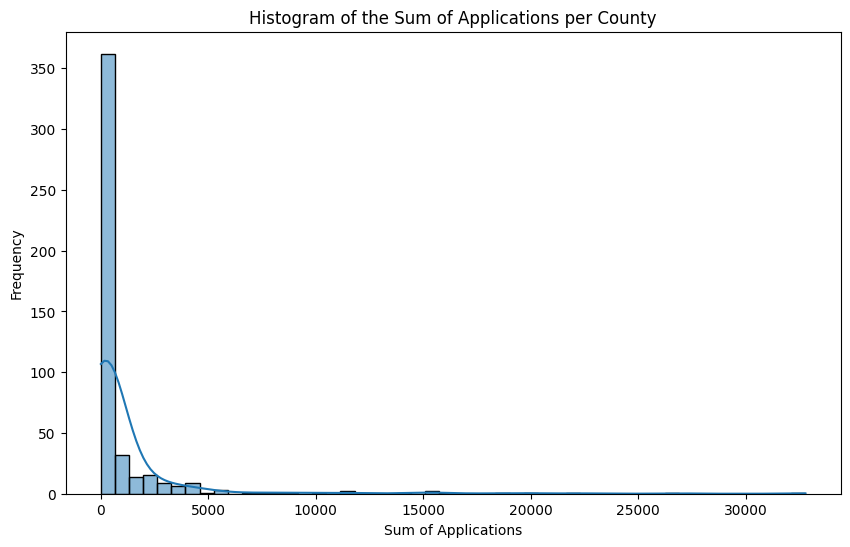

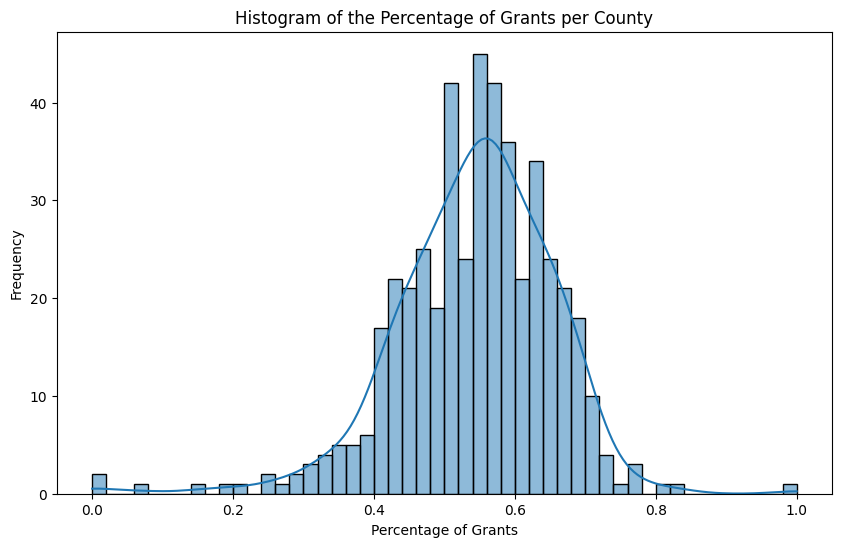

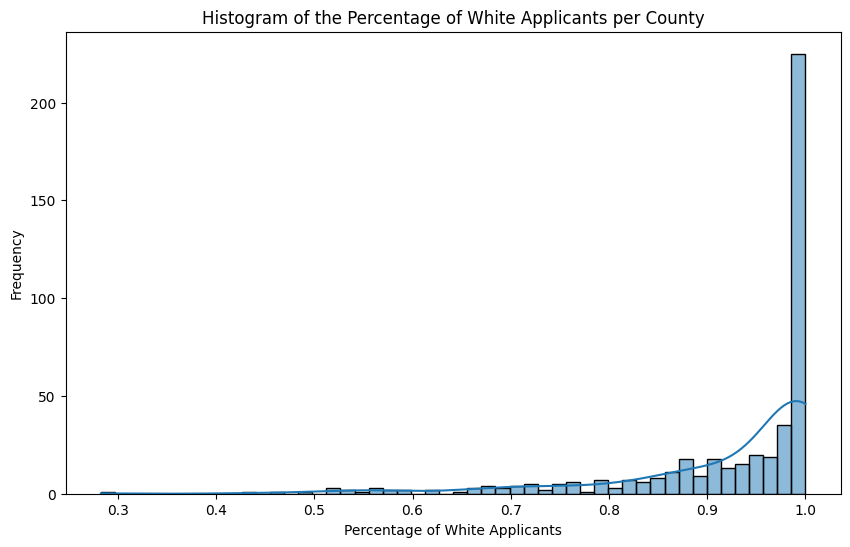

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(HMDA_clean_final_agg["Sum of Applications"], bins=50, kde=True)
plt.title("Histogram of the Sum of Applications per County")
plt.xlabel("Sum of Applications")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(HMDA_clean_final_agg["Percentage of Grants"], bins=50, kde=True)
plt.title("Histogram of the Percentage of Grants per County")
plt.xlabel("Percentage of Grants")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(HMDA_clean_final_agg["Perc. White Applicants"], bins=50, kde=True)
plt.title("Histogram of the Percentage of White Applicants per County")
plt.xlabel("Percentage of White Applicants")
plt.ylabel("Frequency")
plt.show()

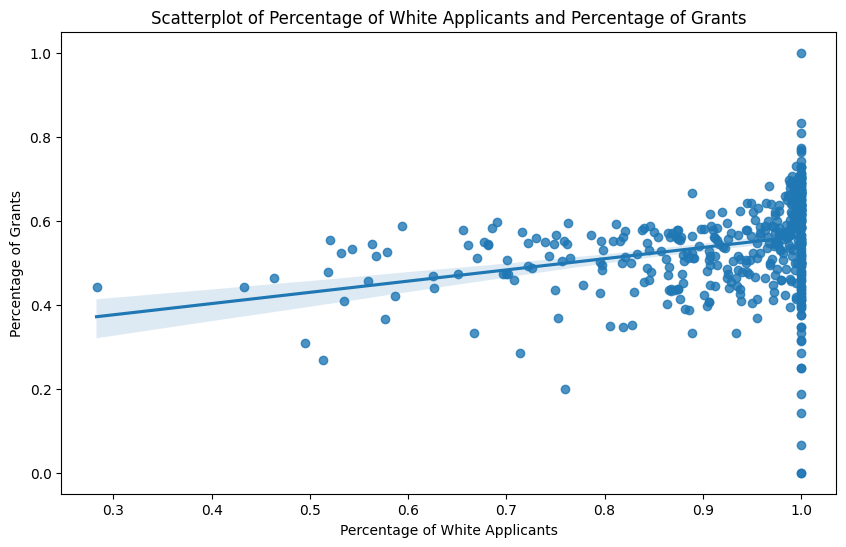

In [133]:
# create a scatterplot with x: Percentage of White Applicants, y: Percentage of Grants and a correlation line
plt.figure(figsize=(10, 6))
sns.regplot(x="Perc. White Applicants", y="Percentage of Grants", data=HMDA_clean_final_agg)
plt.title("Scatterplot of Percentage of White Applicants and Percentage of Grants")
plt.xlabel("Percentage of White Applicants")
plt.ylabel("Percentage of Grants")
plt.show()

In [134]:
prediction_df_orig_rew = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/interim/prediction_pre_store/prediction_df_orig_rew.pkl")

In [135]:
prediction_df_orig_rew["prediction"] = prediction_df_orig_rew["prediction"].astype("int64")
prediction_df_orig_rew["prediction_rew"] = prediction_df_orig_rew["prediction_rew"].astype("int64")
prediction_df_orig_rew["county_code"] = prediction_df_orig_rew["county_code"].astype("int64")

prediction_df_orig_rew["race_code"] = prediction_df_orig_rew["applicant_race-1_White"].apply(lambda x: 1 if x == 1 else 0).astype("int64")
prediction_df_orig_rew = prediction_df_orig_rew[["county_code", "prediction", "prediction_rew", "race_code"]]

In [138]:
prediction_df_orig_rew.head()

,county_code,prediction,prediction_rew,race_code
238575,48167,1,1,1
328268,49035,0,0,1
594872,22019,1,1,1
635106,48467,1,1,1
451212,22033,0,0,0


In [144]:
prediction_df_orig_rew_race_perc = prediction_df_orig_rew.groupby("county_code").agg({"race_code": "mean"}).reset_index(drop=False)
prediction_df_orig_rew_agg_sum = prediction_df_orig_rew.groupby("county_code").sum().reset_index(drop=False)
prediction_df_orig_rew_agg_perc = prediction_df_orig_rew.groupby("county_code").agg({"prediction": "mean", "prediction_rew": "mean"}).reset_index(drop=False)

prediction_df_orig_rew_agg = prediction_df_orig_rew_race_perc.merge(prediction_df_orig_rew_agg_sum, on="county_code")
prediction_df_orig_rew_agg = prediction_df_orig_rew_agg.merge(prediction_df_orig_rew_agg_perc, on="county_code")

prediction_df_orig_rew_agg.columns = ["county_code", "Perc. White Applicants", "Sum of Predictions", "Sum of Predictions Reweighted", "DROP", "Perc. Pred. Grants", "Perc. Pred. Grants Reweighted"]
prediction_df_orig_rew_agg = prediction_df_orig_rew_agg.drop(columns="DROP")

prediction_df_orig_rew_agg.head()


,county_code,Perc. White Applicants,Sum of Predictions,Sum of Predictions Reweighted,Perc. Pred. Grants,Perc. Pred. Grants Reweighted
0,22001,0.854962,166,171,0.633588,0.652672
1,22003,0.793478,56,57,0.608696,0.619565
2,22005,0.692982,685,700,0.667641,0.682261
3,22007,0.710843,51,52,0.614458,0.626506
4,22009,0.816667,122,124,0.677778,0.688889


In [145]:
prediction_df_orig_rew_agg.drop(columns=["county_code"]).describe().T

,count,mean,std,min,25%,50%,75%,max
Perc. White Applicants,459.0,0.918992,0.134842,0.0,0.883932,0.985213,1.000000,1.0
Sum of Predictions,459.0,237.653595,689.725358,0.0,9.000000,41.000000,135.500000,7177.0
Sum of Predictions Reweighted,459.0,238.535948,692.352780,0.0,9.000000,40.000000,137.000000,7194.0
Perc. Pred. Grants,459.0,0.630254,0.155360,0.0,0.575320,0.634043,0.698121,1.0
Perc. Pred. Grants Reweighted,459.0,0.630679,0.157749,0.0,0.578472,0.634615,0.697525,1.0


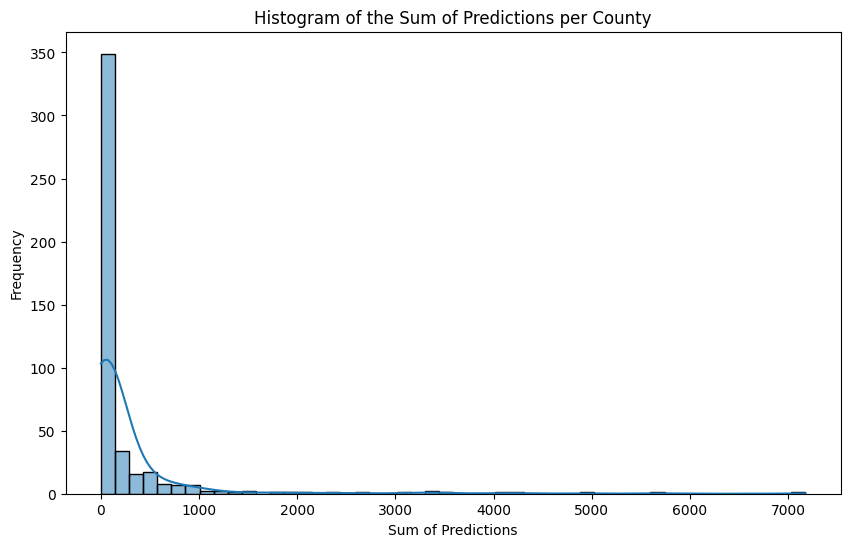

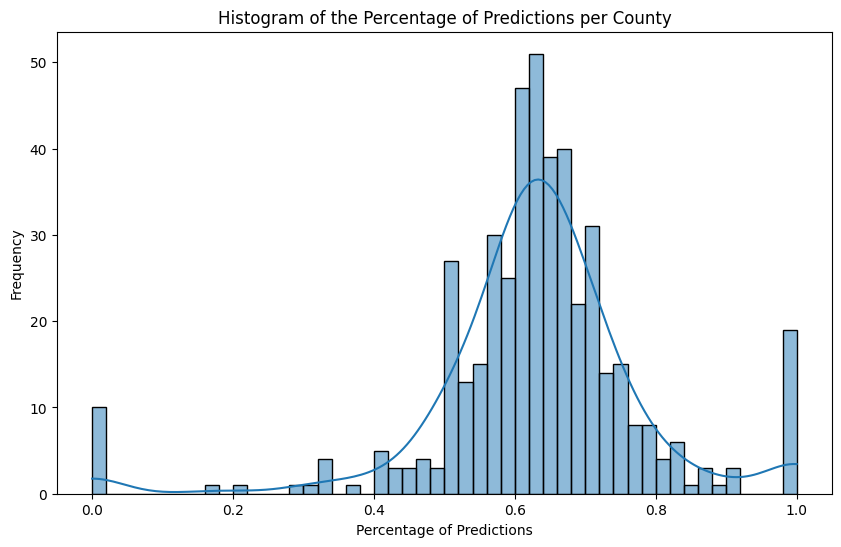

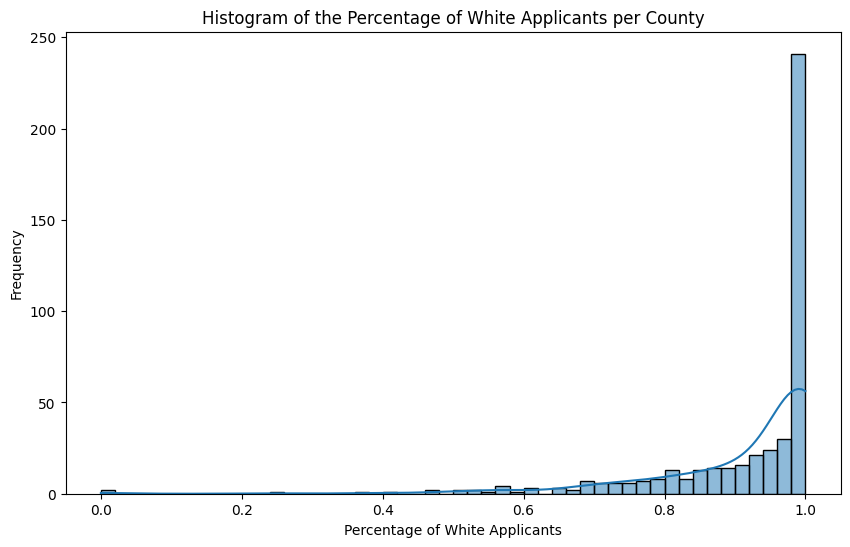

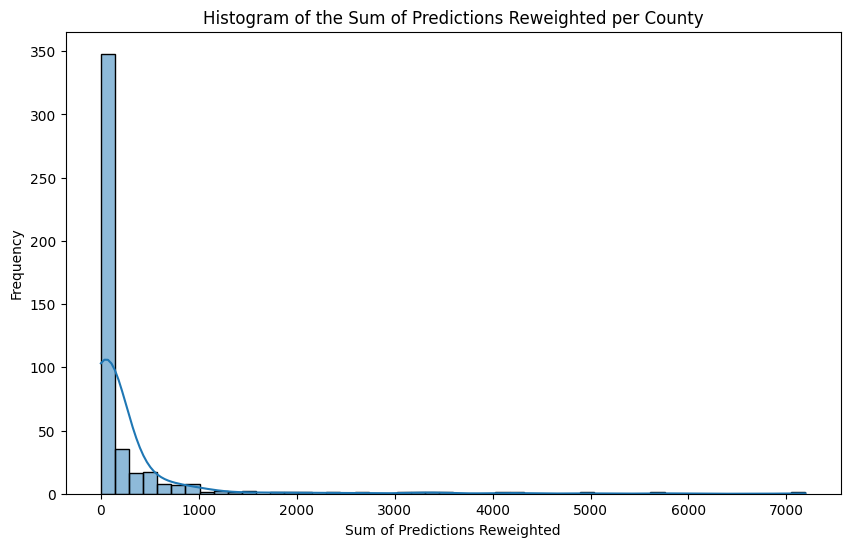

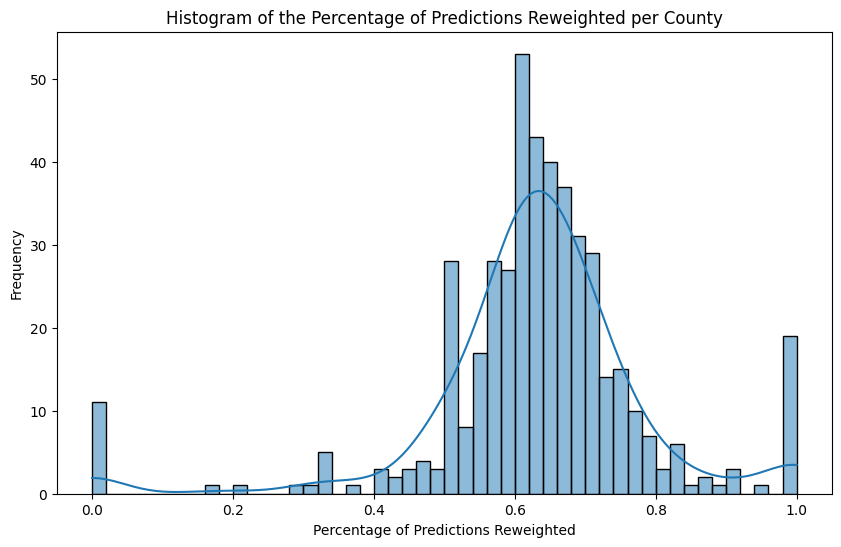

In [146]:
plt.figure(figsize=(10, 6))
sns.histplot(prediction_df_orig_rew_agg["Sum of Predictions"], bins=50, kde=True)
plt.title("Histogram of the Sum of Predictions per County")
plt.xlabel("Sum of Predictions")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(prediction_df_orig_rew_agg["Perc. Pred. Grants"], bins=50, kde=True)
plt.title("Histogram of the Percentage of Predictions per County")
plt.xlabel("Percentage of Predictions")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(prediction_df_orig_rew_agg["Perc. White Applicants"], bins=50, kde=True)
plt.title("Histogram of the Percentage of White Applicants per County")
plt.xlabel("Percentage of White Applicants")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(prediction_df_orig_rew_agg["Sum of Predictions Reweighted"], bins=50, kde=True)
plt.title("Histogram of the Sum of Predictions Reweighted per County")
plt.xlabel("Sum of Predictions Reweighted")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(prediction_df_orig_rew_agg["Perc. Pred. Grants Reweighted"], bins=50, kde=True)
plt.title("Histogram of the Percentage of Predictions Reweighted per County")
plt.xlabel("Percentage of Predictions Reweighted")
plt.ylabel("Frequency")
plt.show()

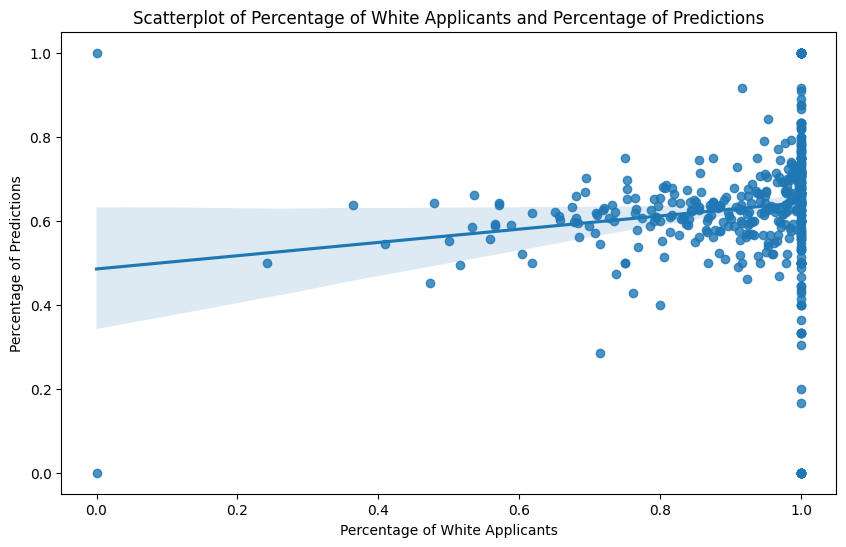

In [147]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Perc. White Applicants", y="Perc. Pred. Grants", data=prediction_df_orig_rew_agg)
plt.title("Scatterplot of Percentage of White Applicants and Percentage of Predictions")
plt.xlabel("Percentage of White Applicants")
plt.ylabel("Percentage of Predictions")
plt.show()

In [150]:
HMDA_clean_final_agg = HMDA_clean_final_agg.merge(low5_geo, left_on="county_code", right_on="FIPS", how="left")
prediction_df_orig_rew_agg = prediction_df_orig_rew_agg.merge(low5_geo, left_on="county_code", right_on="FIPS", how="left")

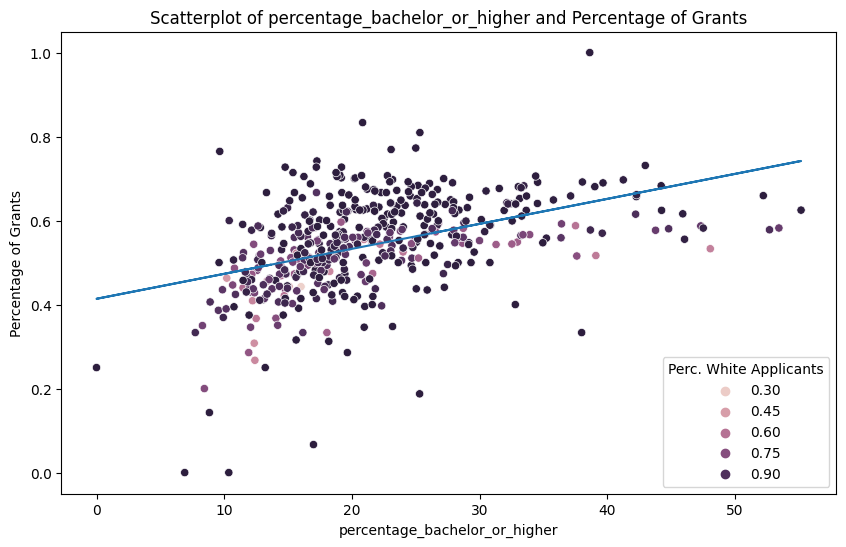

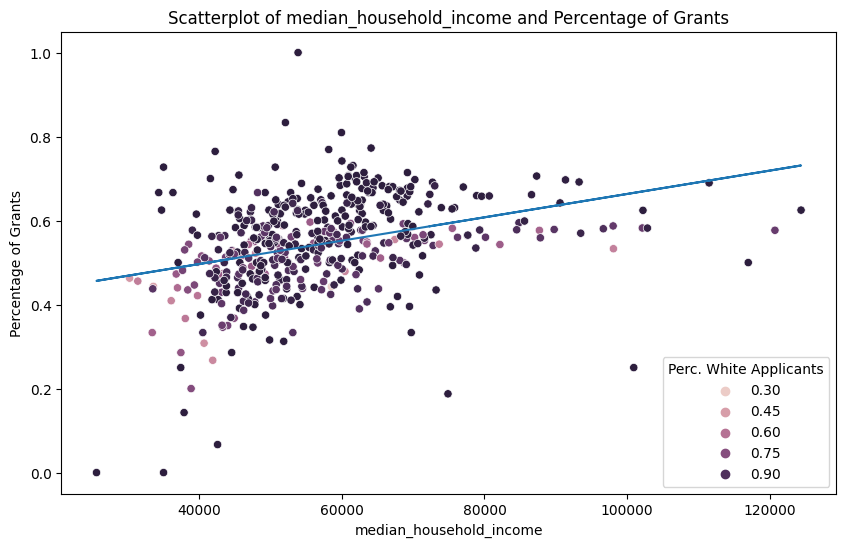

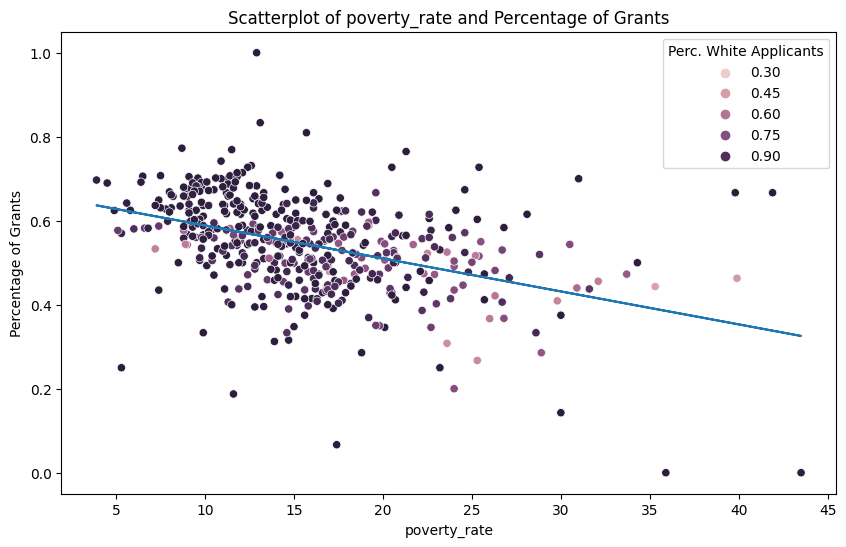

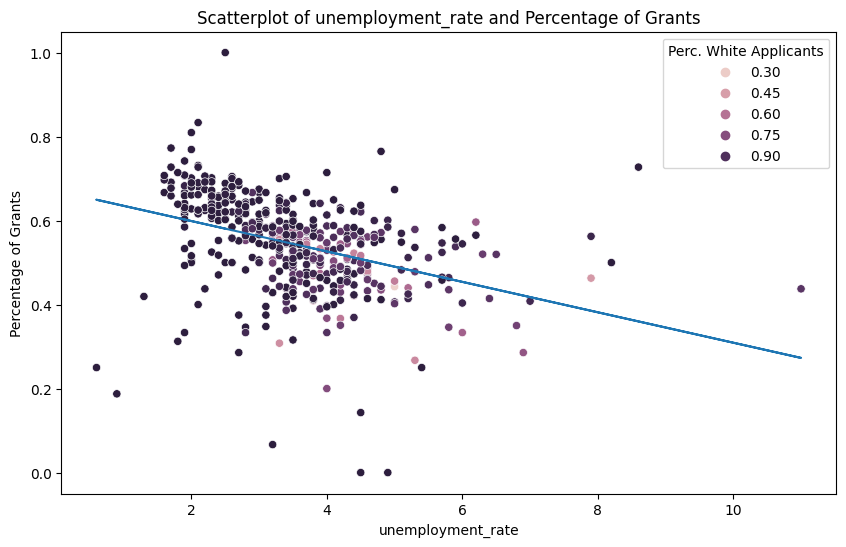

'\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=x, y=y, hue="Perc. White Applicants", data=HMDA_clean_final_agg)\n\nm, b = np.polyfit(x, y, 1)\nplt.plot(x, m*x + b)\n\nplt.title("Scatterplot of Median Household Income and Percentage of Grants")\nplt.xlabel("Median Household Income")\nplt.ylabel("Percentage of Grants")\nplt.show()'

In [166]:
x_list = ["percentage_bachelor_or_higher", "median_household_income", "poverty_rate", "unemployment_rate"]
x = x_list[0]
y = HMDA_clean_final_agg["Percentage of Grants"]


for x in x_list:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, hue="Perc. White Applicants", data=HMDA_clean_final_agg)

    x_data = HMDA_clean_final_agg[x]
    y_data = HMDA_clean_final_agg["Percentage of Grants"]

    m, b = np.polyfit(x_data, y_data, 1)
    plt.plot(x_data, m*x_data + b)

    plt.title(f"Scatterplot of {x} and Percentage of Grants")
    plt.xlabel(x)
    plt.ylabel("Percentage of Grants")
    plt.show();

In [174]:
counties_over_1k_apps = HMDA_clean_final_agg[HMDA_clean_final_agg["Sum of Applications"] > 1000].sort_values(by="Perc. White Applicants", ascending=False)

In [184]:
counties_over_1k_apps

,county_code,Sum of Applications,Percentage of Grants,Perc. White Applicants,FIPS,County,percentage_college_degree,percentage_bachelor_or_higher,percentage_high_school,percentage_less_than_high_school,population,poverty_rate,median_household_income,unemployment_rate
439,49003,1964,0.668710,0.999660,49003,Box Elder County,37.251143,24.430025,32.039522,6.279310,61498.0,8.0,69538.0,2.3
461,49047,1094,0.585967,0.999464,49047,Uintah County,34.998806,17.305947,35.275854,12.419393,37141.0,11.9,64105.0,3.6
448,49021,2074,0.655499,0.998104,49021,Iron County,40.074010,29.208537,24.050148,6.667305,62429.0,13.3,61421.0,2.4
79,30031,2625,0.659382,0.997990,30031,Gallatin County,26.915962,52.213720,18.316588,2.553729,124857.0,8.8,78910.0,1.9
78,30029,2403,0.624318,0.997922,30029,Flathead County,33.413771,33.649662,27.881187,5.055380,111814.0,9.5,65835.0,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,22033,6945,0.587812,0.593398,22033,East Baton Rouge Parish,27.151936,37.510669,25.776231,9.561164,450544.0,19.2,51746.0,3.5
8,22017,3143,0.525322,0.578305,22017,Caddo Parish,30.462669,24.004595,32.082716,13.450019,229025.0,23.6,44968.0,4.1
35,22071,4548,0.516759,0.567322,22071,Orleans Parish,26.628218,39.101610,22.445192,11.824980,369749.0,25.2,46188.0,4.5
313,48257,3801,0.543855,0.563314,48257,Kaufman County,34.466079,22.189876,29.746616,13.597429,172366.0,8.9,73660.0,3.7


In [191]:
counties_varying_white_applicants = counties_over_1k_apps["county_code"].iloc[[0, len(counties_over_1k_apps) // 2, -1]].tolist()

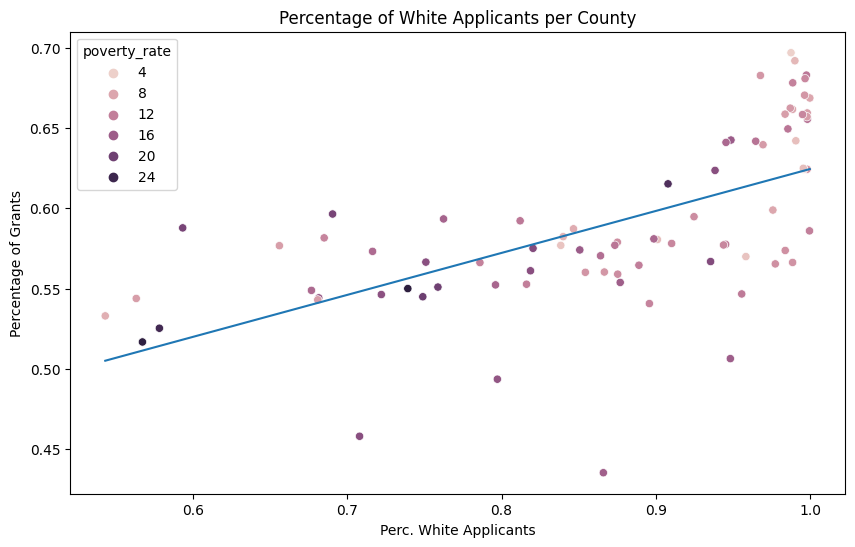

In [204]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Perc. White Applicants", y="Percentage of Grants", hue="poverty_rate", data=counties_over_1k_apps)

x_data = counties_over_1k_apps["Perc. White Applicants"]
y_data = counties_over_1k_apps["Percentage of Grants"]
m, b = np.polyfit(x_data, y_data, 1)
plt.plot(x_data, m*x_data + b)

plt.title("Percentage of White Applicants per County")
plt.show()